In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
training_data = pd.read_csv('https://raw.githubusercontent.com/jalajthanaki/credit-risk-modelling/master/data/cs-training.csv', index_col = 0)
training_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# **Understanding attributes of the dataset**

Bộ data này có 11 thuộc tính như sau


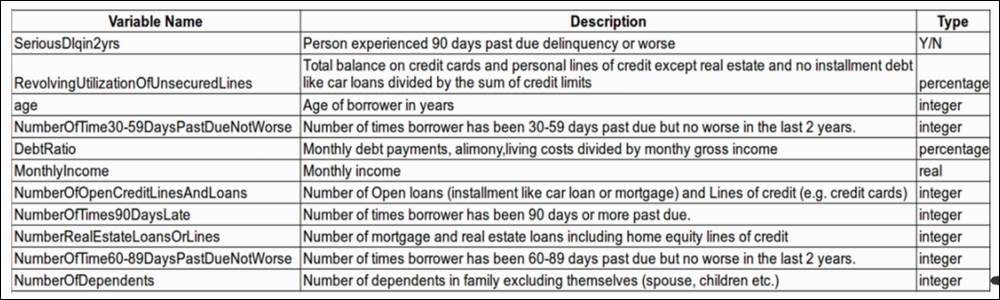

**1. SeriousDlqin2yrs**


*   Thuộc tính này để chỉ khách hàng có bị lần nào quá hạn trả nợ hàng tháng nhiều hơn 90 ngày trong 2 năm tới không. Giá trị của thuộc tính là Y (Yes) hoặc N (No)

*   Đây là thuộc tính chúng ta sẽ dự đoán ở bộ dữ liệu test

**2. RevolvingUtilizationOfUnsecuredLines**

*   Thuộc tính này để chỉ hạn mức tín dụng của khách hàng không tính các khoản vay nợ hiện tại và bất động sản (#là tỷ lệ hạn mức còn lại được dùng/hạn mức tối đa có thể sử dụng trừ các khoản vay và BĐS) 
*   Ví dụ như mình có 1 thẻ tín dụng và hạn mức của nó là 1,000 đô. Trong tài khoản ngân hàng cá nhân của mình cũng đang có 1,000 đô. Số dư thẻ tín dụng là 500 đô. Vậy số dư tối đa mình có thể có thông qua thẻ tín dụng và tài khoản ngân hàng cá nhân là 1000 đô + 1000 đô = 2000 đô, mình đã sử dụng 500 đô từ hạn mức tín dụng cho nên tổng số dư là 500 đô + 1000 đô = 1500 đô. Giá trị **RevolvingUtilizationOfUnsecuredLines** ở đây là 1500/2000 = 0.75



**3. Age**


*   Tuổi của khách hàng



**4. NumberOfTime30-59DaysPastDueNotWorse**


*   Số lần khách hàng chậm thanh toán các khoản trả hàng tháng từ 30-59 ngày



**5. DebtRatio**


*   Tỉ lệ nợ
*   Ví dụ khoản nợ hàng tháng của mình là 200 đô, và chi tiêu hàng tháng là 500 đô, thu nhập hàng tháng là 1000 đô, thì tỉ lệ nợ là (200 + 500)/1000 = 0.7



**6. MonthlyIncome**


*   Thu nhập hàng tháng



**7. NumberOfOpenCreditLinesAndLoans**


*   Số khoản vay và/hoặc số thẻ tín dụng của khách hàng



**8. NumberOfTimes90DaysLate**


*   Số lần khách hàng chậm thanh toán các khoản trả hàng tháng lớn hơn 90 ngày 



**9. NumberRealEstateLoansOrLines**


*   Số khoản vay của khách hàng liên quan đến bất động sản



**10. NumberOfTime60-89DaysPastDueNotWorse**


*   Số lần khách hàng chậm thanh toán các khoản trả hàng tháng từ 60 - 89 ngày và trong 2 năm gần nhất không có lần nào khách hàng chậm trả lớn hơn 90 ngày 



**11. NumberOfDependents**


*   Số người phụ thuộc trong gia đình



# **Listing statistical properties**

In [ ]:
training_data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

Biến SeriousDlquin2yrs là biến phụ thuộc (đồng thời là biến phân loại hay rời rạc chỉ nhận 2 giá trị 0 và 1).
10 biến còn lại là biến độc lập, trong đó có 4 biến có kiểu dữ liệu là float là biến liên tục và 6 biến còn lại là biến rời rạc.

In [ ]:
# Number of each category of the target label
training_data['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
# Which category of the target label is how many percentage.
training_data['SeriousDlqin2yrs'].value_counts()/len(training_data)*100

0    93.316
1     6.684
Name: SeriousDlqin2yrs, dtype: float64

Có đến 93.316% dữ liệu có biến đầu ra được label 0, trong khi chỉ có 6.684% được label 1. Đây là hiện tượng mất cân bằng dữ liệu xảy ra rất thường xuyên trong ML

# **Visualization**

In [ ]:
training_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

**RevolvingUtilizationOfUnsecuredLines**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


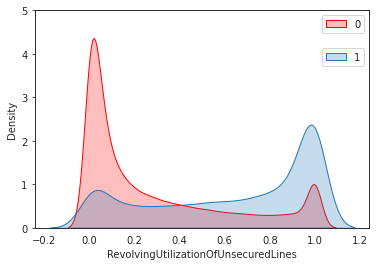

In [ ]:
sns.set_style('white')
ax1 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 0][training_data['RevolvingUtilizationOfUnsecuredLines'] < 1]['RevolvingUtilizationOfUnsecuredLines'], 
                  color='red', label = '0', fill=True)
ax2 = plt.twinx()
ax2 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 1][training_data['RevolvingUtilizationOfUnsecuredLines'] < 1]['RevolvingUtilizationOfUnsecuredLines'], 
                  label = '1', fill=True)
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.85))
ax1.set_ylim(ymax=5)
ax2.set_ylim(ymax=5)
plt.ylabel('')
ax2.set_yticks([])
plt.show()

**age**

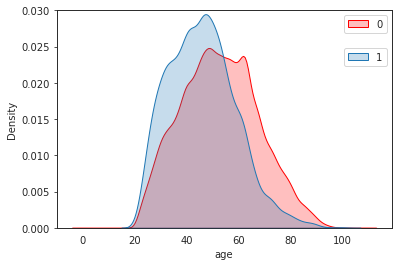

In [ ]:
ax1 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 0]['age'], 
                  color='red', label = '0', fill=True)
ax2 = plt.twinx()
ax2 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 1]['age'], 
                  label = '1', fill=True)
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.85))
ax1.set_ylim(ymax=0.03)
ax2.set_ylim(ymax=0.03)
plt.ylabel('')
ax2.set_yticks([])
plt.show()

**NumberOfTime30-59DaysPastDueNotWorse**

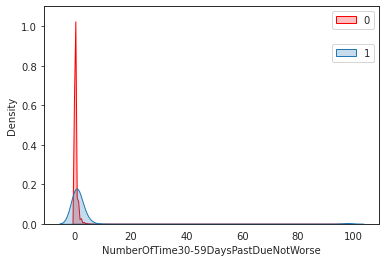

In [ ]:
ax1 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 0]['NumberOfTime30-59DaysPastDueNotWorse'], 
                  color='red', label = '0', fill=True)
ax2 = plt.twinx()
ax2 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 1]['NumberOfTime30-59DaysPastDueNotWorse'], 
                  label = '1', fill=True)
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.85))
ax1.set_ylim(ymax=1.1)
ax2.set_ylim(ymax=1.1)
plt.ylabel('')
ax2.set_yticks([])
plt.show()

**DebtRatio**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


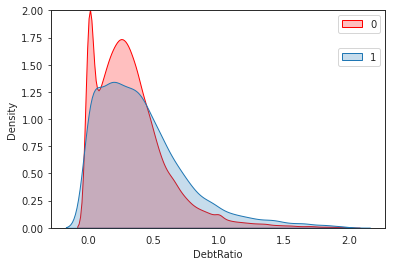

In [ ]:
ax1 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 0][training_data['DebtRatio'] < 2]['DebtRatio'], 
                  color='red', label = '0', fill=True)
ax2 = plt.twinx()
ax2 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 1][training_data['DebtRatio'] < 2]['DebtRatio'], 
                  label = '1', fill=True)
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.85))
ax1.set_ylim(ymax=2)
ax2.set_ylim(ymax=2)
plt.ylabel('')
ax2.set_yticks([])
plt.show()

**MonthlyIncome**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


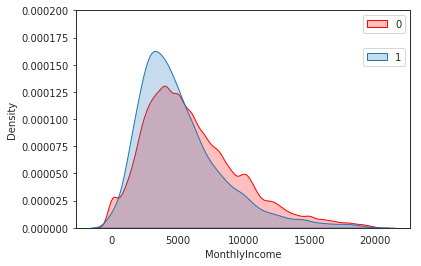

In [ ]:
ax1 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 0][training_data['MonthlyIncome'] < 20000]['MonthlyIncome'], 
                  color='red', label = '0', fill=True)
ax2 = plt.twinx()
ax2 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 1][training_data['MonthlyIncome'] < 20000]['MonthlyIncome'], 
                  label = '1', fill=True)
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.85))
ax1.set_ylim(ymax=0.0002)
ax2.set_ylim(ymax=0.0002)
plt.ylabel('')
ax2.set_yticks([])
plt.show()

**NumberOfOpenCreditLinesAndLoans** 

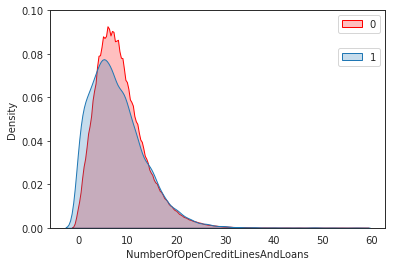

In [ ]:
ax1 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 0]['NumberOfOpenCreditLinesAndLoans'], 
                  color='red', label = '0', fill=True)
ax2 = plt.twinx()
ax2 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 1]['NumberOfOpenCreditLinesAndLoans'], 
                  label = '1', fill=True)
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.85))
ax1.set_ylim(ymax=0.1)
ax2.set_ylim(ymax=0.1)
plt.ylabel('')
ax2.set_yticks([])
plt.show()

**NumberOfTimes90DaysLate**

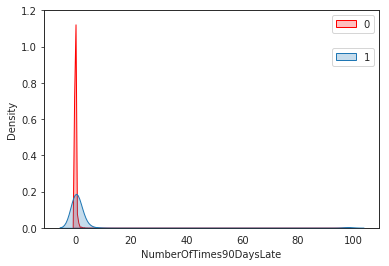

In [ ]:
ax1 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 0]['NumberOfTimes90DaysLate'], 
                  color='red', label = '0', fill=True)
ax2 = plt.twinx()
ax2 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 1]['NumberOfTimes90DaysLate'], 
                  label = '1', fill=True)
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.85))
ax1.set_ylim(ymax=1.2)
ax2.set_ylim(ymax=1.2)
plt.ylabel('')
ax2.set_yticks([])
plt.show()

**NumberRealEstateLoansOrLines**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


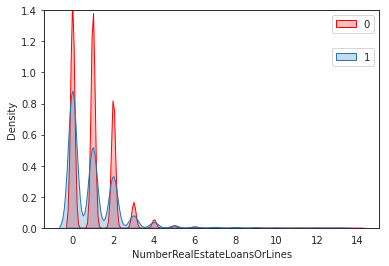

In [ ]:
ax1 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 0][training_data['NumberRealEstateLoansOrLines'] < 15]['NumberRealEstateLoansOrLines'], 
                  color='red', label = '0', fill=True)
ax2 = plt.twinx()
ax2 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 1][training_data['NumberRealEstateLoansOrLines'] < 15]['NumberRealEstateLoansOrLines'], 
                  label = '1', fill=True)
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.85))
ax1.set_ylim(ymax=1.4)
ax2.set_ylim(ymax=1.4)
plt.ylabel('')
ax2.set_yticks([])
plt.show()

**NumberOfTime60-89DaysPastDueNotWorse**

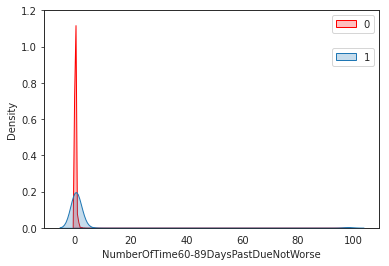

In [ ]:
ax1 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 0]['NumberOfTime60-89DaysPastDueNotWorse'], 
                  color='red', label = '0', fill=True)
ax2 = plt.twinx()
ax2 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 1]['NumberOfTime60-89DaysPastDueNotWorse'], 
                  label = '1', fill=True)
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.85))
ax1.set_ylim(ymax=1.2)
ax2.set_ylim(ymax=1.2)
plt.ylabel('')
ax2.set_yticks([])
plt.show()

**NumberOfDependents**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


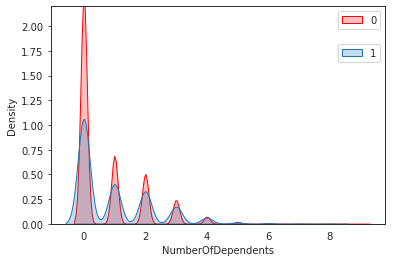

In [ ]:
ax1 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 0][training_data['NumberOfDependents'] < 10]['NumberOfDependents'], 
                  color='red', label = '0', fill=True)
ax2 = plt.twinx()
ax2 = sns.kdeplot(training_data[training_data['SeriousDlqin2yrs'] == 1][training_data['NumberOfDependents'] < 10]['NumberOfDependents'], 
                  label = '1', fill=True)
ax1.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.85))
ax1.set_ylim(ymax=2.2)
ax2.set_ylim(ymax=2.2)
plt.ylabel('')
ax2.set_yticks([])
plt.show()

**Correlation**

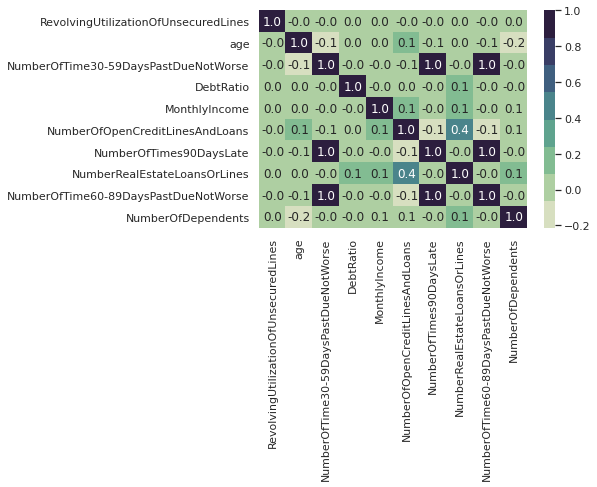

In [ ]:
sns.set()
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

Kết quả phân tích tương quan cho thấy những người có nợ quá hạn hơn 30 ngày thì có xu hướng nợ quá hạn trên 60 ngày và trên 90 ngày.

# **Handle missing data**

**Finding missing values**

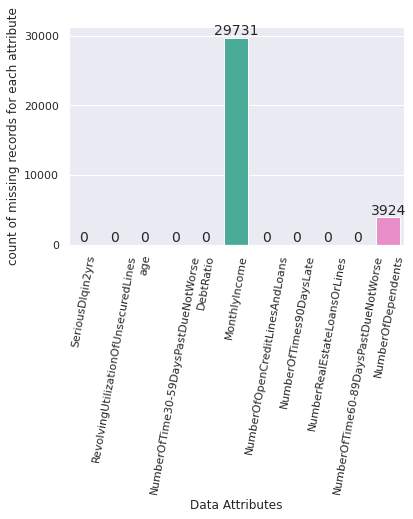

In [ ]:
# Graphical representation of the missing values.
x = training_data.columns
y = training_data.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=80)
plt.show()

**Replacing missing values**

In [ ]:
# Actual replacement of the missing value using median value.
training_data = training_data.fillna((training_data.median()))
training_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# **Handle the outliers**

In [ ]:
# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    #return minval, maxval
    return ((data < minval) | (data > maxval))

In [ ]:
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return np.abs(modified_z_scores) > threshold

In [ ]:
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if abs(val - mean)/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

In [ ]:
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = list(zip(data.index, x, y, z))
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

In [ ]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10)

In [ ]:
def replaceOutlier(col_name, which_part, replace, method = None, min_upper = 0, max_lower = 0):
    if method == 'Percentile-based Outliers':
        min_upper = training_data[col_name][percentile_based_outlier(training_data[col_name])].min()
    elif method == 'MAD-based Outliers':
        min_upper = training_data[col_name][mad_based_outlier(training_data[col_name])].min()
    elif method == 'STD-based Outliers':
        min_upper = training_data[col_name][std_div(training_data[col_name])].min()
    elif method == 'Majority vote based Outliers':
        min_upper = training_data[col_name][outlierVote(training_data[col_name])].min()

    med = training_data[col_name].median()
    if which_part == 'upper':
        if replace == 'median':   
            training_data[col_name] = training_data[col_name].apply(lambda x: med if x > min_upper else x)
        elif replace == 'min_upper':
            training_data[col_name] = training_data[col_name].apply(lambda x: min_upper if x > min_upper else x)
    elif which_part == 'lower':
        if replace == 'median':   
            training_data[col_name] = training_data[col_name].apply(lambda x: med if x < max_lower else x)
        elif replace == 'max_lower':
            training_data[col_name] = training_data[col_name].apply(lambda x: max_lower if x < max_lower else x)


In [ ]:
training_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


**Handle outlier of column RevolvingUtilizationOfUnsecuredLines**

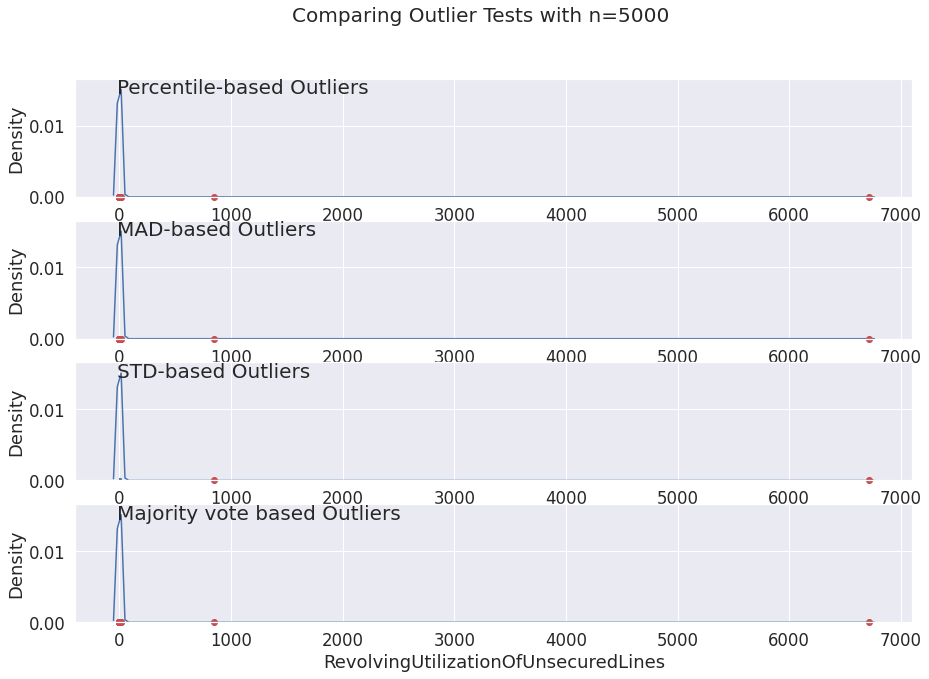

In [ ]:
plotOutlier(training_data['RevolvingUtilizationOfUnsecuredLines'].sample(5000))
plt.show()

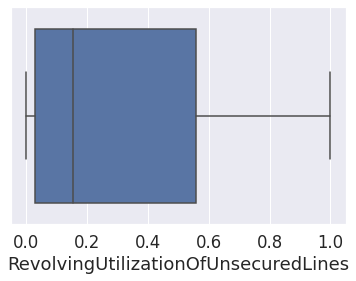

In [ ]:
replaceOutlier(col_name = 'RevolvingUtilizationOfUnsecuredLines', which_part='upper', replace='min_upper', min_upper=0.99999)
sns.boxplot(x=training_data['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

**Handle outlier of column Age**

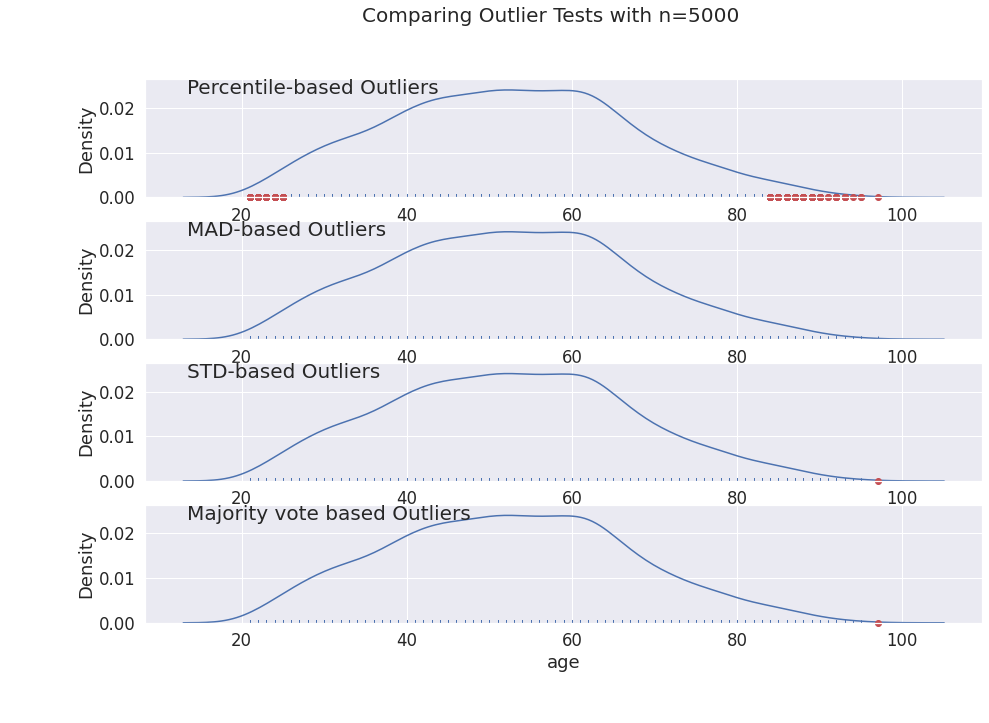

In [ ]:
plotOutlier(training_data['age'].sample(5000))
plt.show()

In [ ]:
import collections
collections.Counter(training_data['age'])

Counter({0: 1,
         21: 183,
         22: 434,
         23: 641,
         24: 816,
         25: 953,
         26: 1193,
         27: 1338,
         28: 1560,
         29: 1702,
         30: 1937,
         31: 2038,
         32: 2050,
         33: 2239,
         34: 2155,
         35: 2246,
         36: 2379,
         37: 2521,
         38: 2631,
         39: 2987,
         40: 3093,
         41: 3122,
         42: 3082,
         43: 3208,
         44: 3294,
         45: 3502,
         46: 3714,
         47: 3719,
         48: 3806,
         49: 3837,
         50: 3753,
         51: 3627,
         52: 3609,
         53: 3648,
         54: 3561,
         55: 3416,
         56: 3589,
         57: 3375,
         58: 3443,
         59: 3280,
         60: 3258,
         61: 3522,
         62: 3568,
         63: 3719,
         64: 3058,
         65: 2594,
         66: 2494,
         67: 2503,
         68: 2235,
         69: 1954,
         70: 1777,
         71: 1646,
         72: 1649,
  

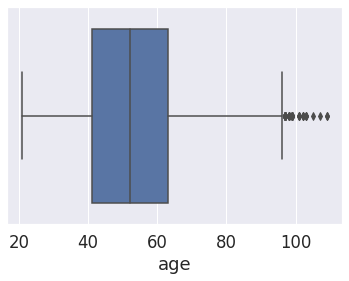

In [ ]:
replaceOutlier(col_name='age', which_part='lower', replace='max_lower', max_lower=21)
sns.boxplot(x=training_data['age'])
plt.show()

**Handle outlier of column NumberOfTime30-59DaysPastDueNotWorse**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


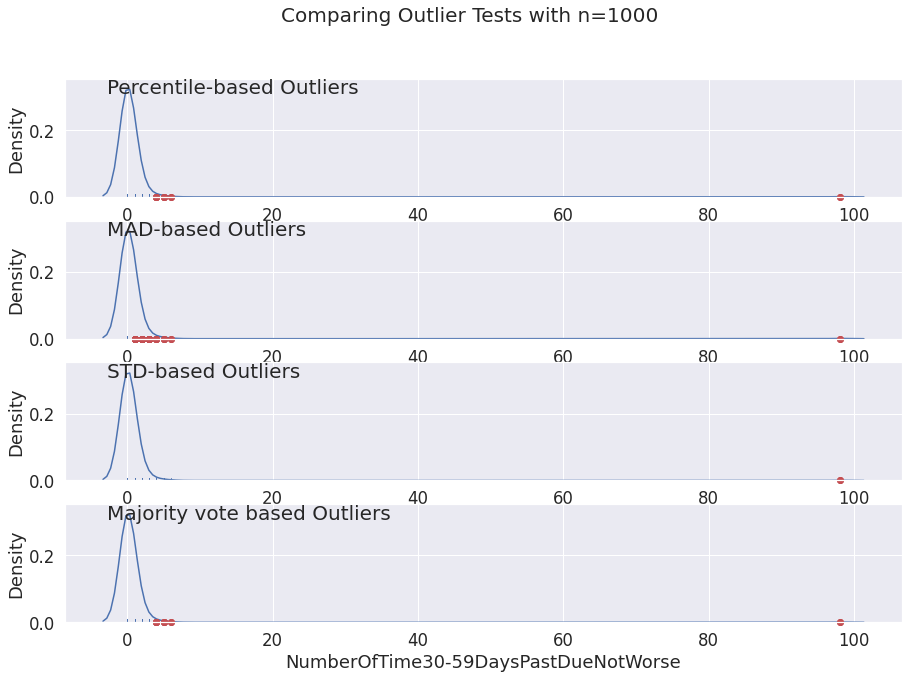

In [ ]:
plotOutlier(training_data['NumberOfTime30-59DaysPastDueNotWorse'].sample(1000))

In [ ]:
import collections
collections.Counter(training_data['NumberOfTime30-59DaysPastDueNotWorse'])

Counter({0: 126018,
         1: 16033,
         2: 4598,
         3: 1754,
         4: 747,
         5: 342,
         6: 140,
         7: 54,
         8: 25,
         9: 12,
         10: 4,
         11: 1,
         12: 2,
         13: 1,
         96: 5,
         98: 264})

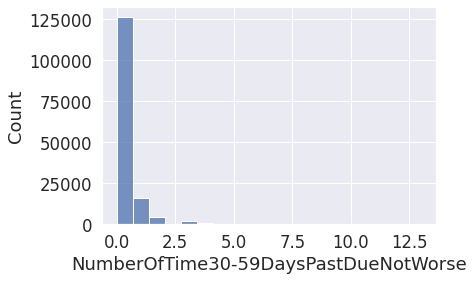

In [ ]:
replaceOutlier('NumberOfTime30-59DaysPastDueNotWorse', which_part='upper', replace='median', min_upper=95)
sns.histplot(x=training_data['NumberOfTime30-59DaysPastDueNotWorse'])
plt.show()

**Handle outlier of column DebtRatio**

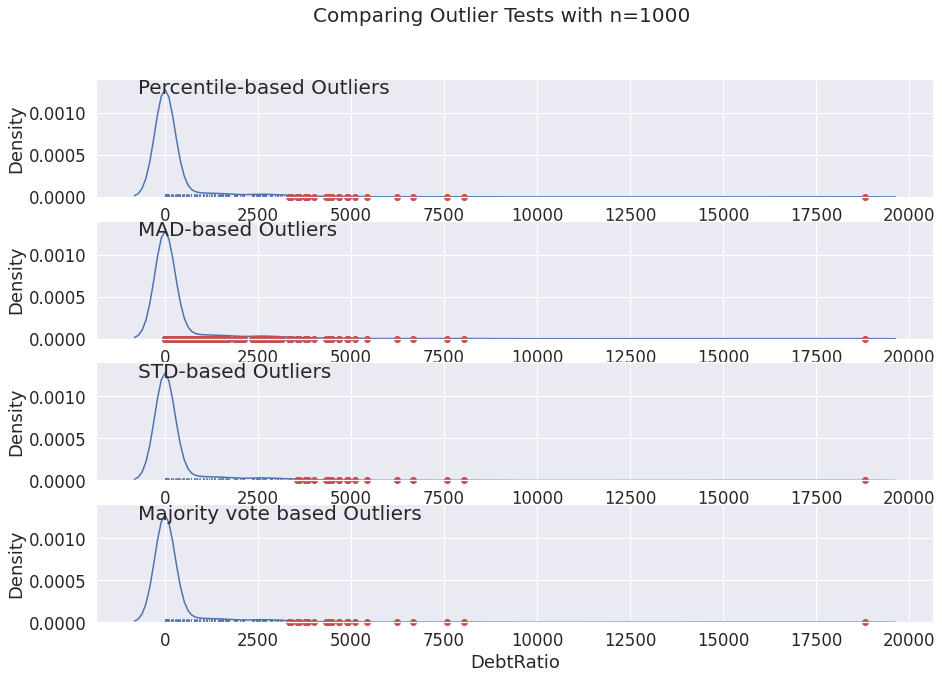

In [ ]:
plotOutlier(training_data['DebtRatio'].sample(1000))

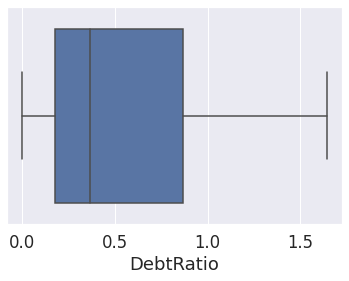

In [ ]:
replaceOutlier(col_name='DebtRatio', which_part='upper', replace='min_upper', method='MAD-based Outliers')
sns.boxplot(x=training_data['DebtRatio'])
plt.show()

**Handle outlier of column MonthlyIncome**

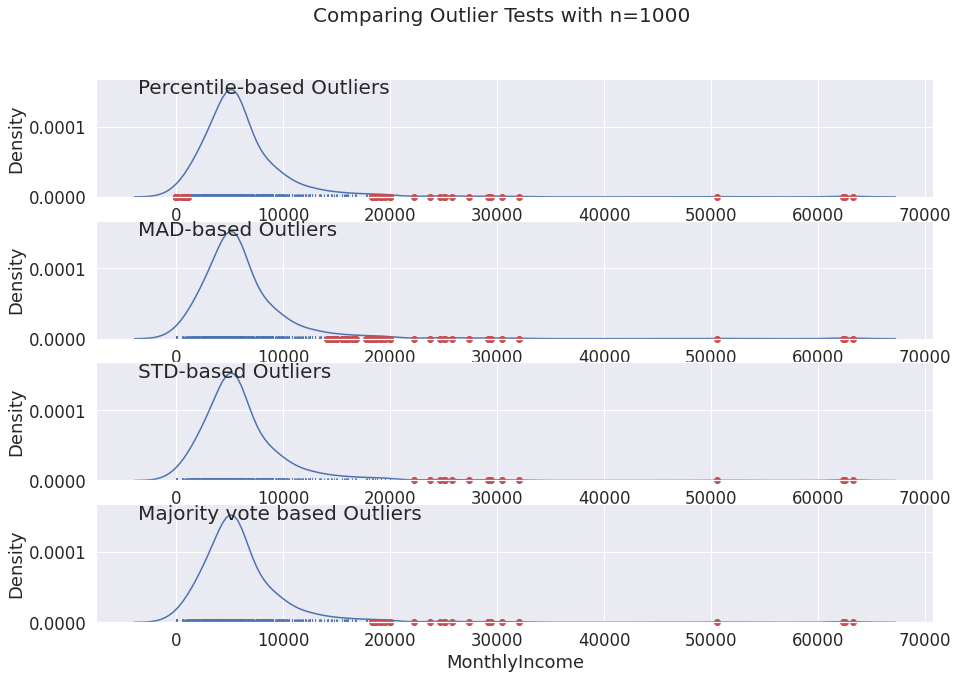

In [ ]:
plotOutlier(training_data['MonthlyIncome'].sample(1000))

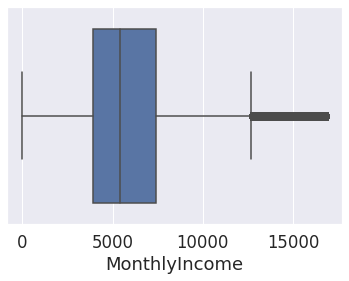

In [ ]:
replaceOutlier(col_name='MonthlyIncome', which_part='upper', replace='min_upper', method='Majority vote based Outliers')
sns.boxplot(x=training_data['MonthlyIncome'])
plt.show()

**Handle outlier of column NumberOfTimes90DaysLate**

In [ ]:
collections.Counter(training_data['NumberOfTimes90DaysLate'])

Counter({0: 141662,
         1: 5243,
         2: 1555,
         3: 667,
         4: 291,
         5: 131,
         6: 80,
         7: 38,
         8: 21,
         9: 19,
         10: 8,
         11: 5,
         12: 2,
         13: 4,
         14: 2,
         15: 2,
         17: 1,
         96: 5,
         98: 264})

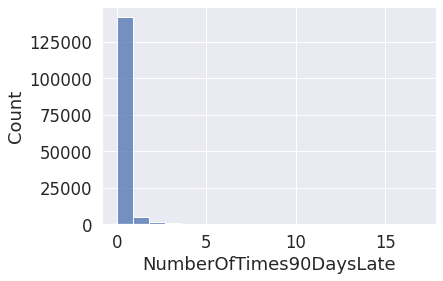

In [ ]:
replaceOutlier(col_name='NumberOfTimes90DaysLate', which_part='upper', replace='median', min_upper=95)
sns.histplot(x=training_data['NumberOfTimes90DaysLate'])
plt.show()

**Handle outlier of column NumberOfTime60-89DaysPastDueNotWorse**

In [ ]:
collections.Counter(training_data['NumberOfTime60-89DaysPastDueNotWorse'])

Counter({0: 142396,
         1: 5731,
         2: 1118,
         3: 318,
         4: 105,
         5: 34,
         6: 16,
         7: 9,
         8: 2,
         9: 1,
         11: 1,
         96: 5,
         98: 264})

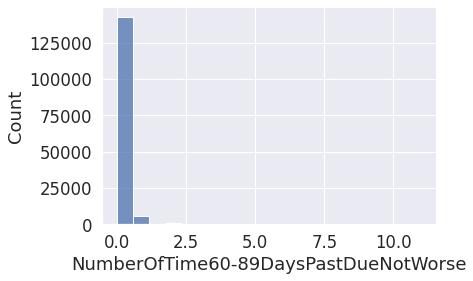

In [ ]:
replaceOutlier(col_name='NumberOfTime60-89DaysPastDueNotWorse', which_part='upper', replace='median', min_upper=95)
sns.histplot(x=training_data['NumberOfTime60-89DaysPastDueNotWorse'])
plt.show()

**Handle outlier of column NumberOfDependents**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


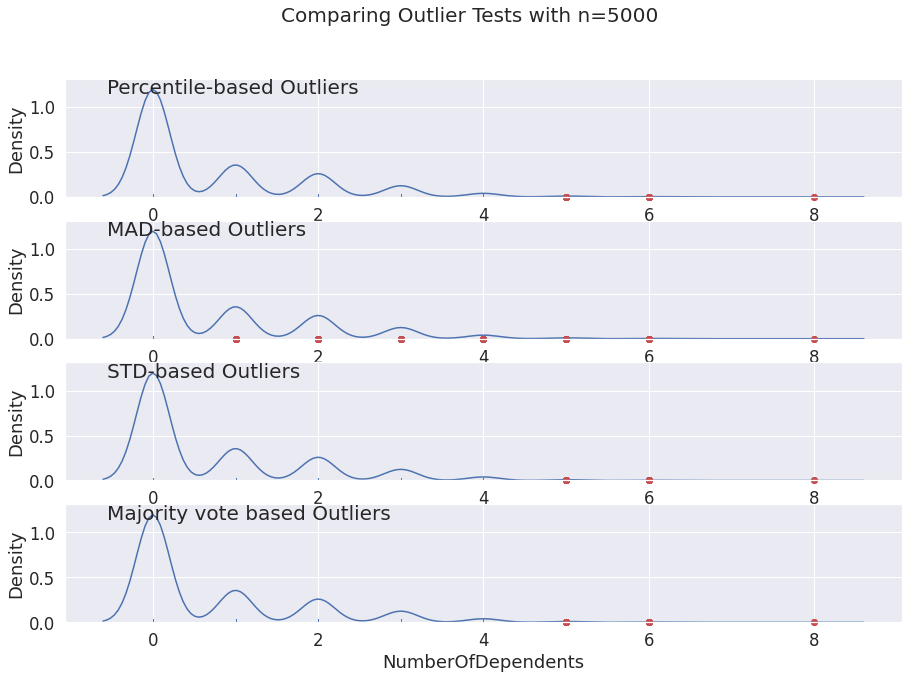

In [ ]:
plotOutlier(training_data['NumberOfDependents'].sample(5000))

In [ ]:
collections.Counter(training_data['NumberOfDependents'])

Counter({0.0: 90826,
         1.0: 26316,
         2.0: 19522,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         7.0: 51,
         8.0: 24,
         9.0: 5,
         10.0: 5,
         13.0: 1,
         20.0: 1})

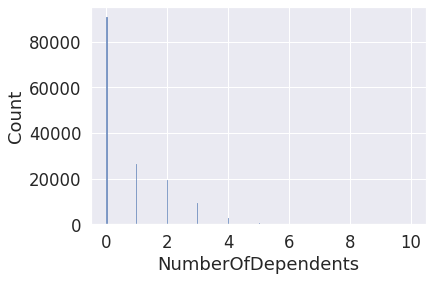

In [ ]:
replaceOutlier(col_name='NumberOfDependents', which_part='upper', replace='min_upper', min_upper=10)
sns.histplot(x=training_data['NumberOfDependents'])
plt.show()

**Handle outlier of column NumberRealEstateLoansOrLines**

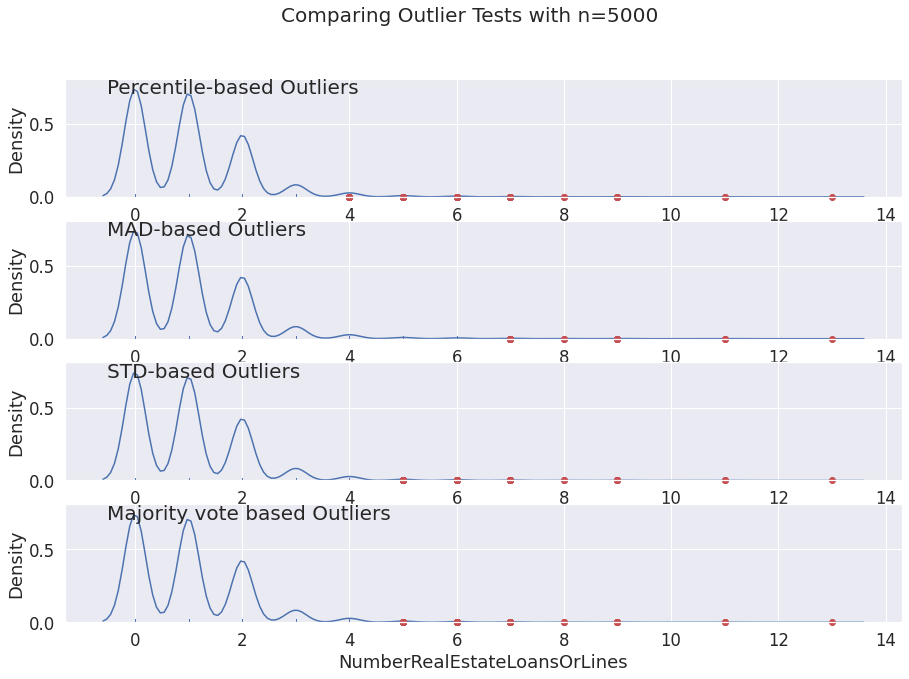

In [ ]:
plotOutlier(training_data['NumberRealEstateLoansOrLines'].sample(5000))

In [ ]:
collections.Counter(training_data['NumberRealEstateLoansOrLines'])

Counter({0: 56188,
         1: 52338,
         2: 31522,
         3: 6300,
         4: 2170,
         5: 689,
         6: 320,
         7: 171,
         8: 93,
         9: 78,
         10: 37,
         11: 23,
         12: 18,
         13: 15,
         14: 7,
         15: 7,
         16: 4,
         17: 4,
         18: 2,
         19: 2,
         20: 2,
         21: 1,
         23: 2,
         25: 3,
         26: 1,
         29: 1,
         32: 1,
         54: 1})

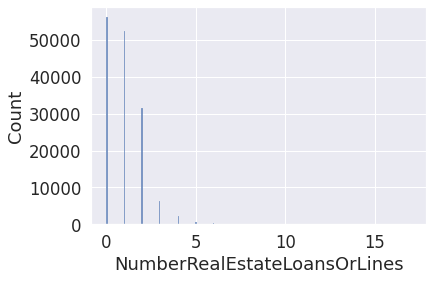

In [ ]:
replaceOutlier(col_name='NumberRealEstateLoansOrLines', which_part='upper', replace='min_upper', min_upper=17)
sns.histplot(x=training_data['NumberRealEstateLoansOrLines'])
plt.show()

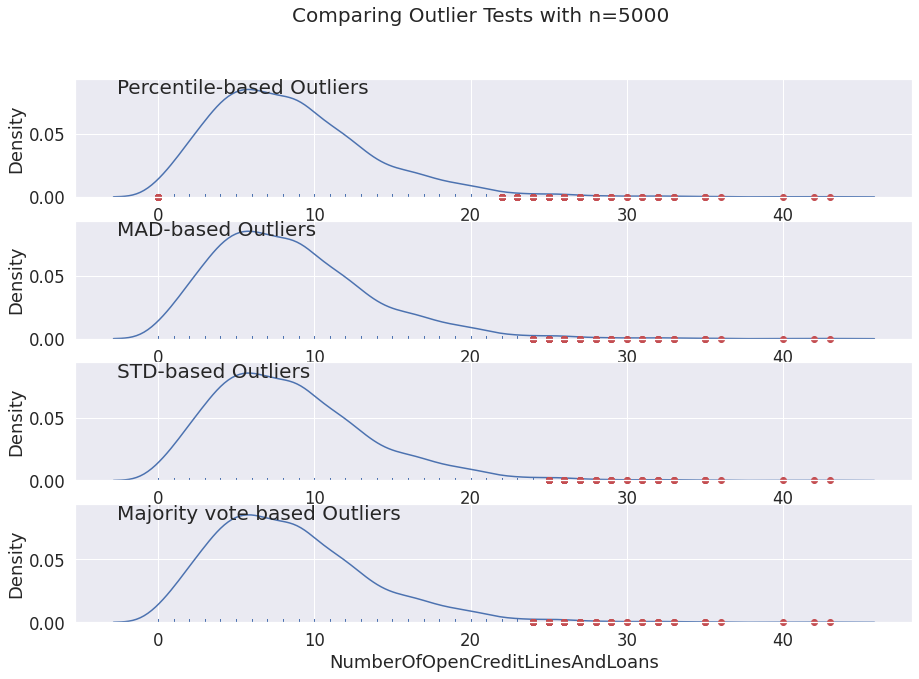

In [ ]:
plotOutlier(training_data['NumberOfOpenCreditLinesAndLoans'].sample(5000))

# **Train and build baseline model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
X = training_data.drop('SeriousDlqin2yrs', axis=1)
y = training_data['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X_train = scaler.fit_transform(X_train)

In [ ]:
knMod = KNeighborsClassifier()
glmMod = LogisticRegression()
adaMod = AdaBoostClassifier()
gbMod = GradientBoostingClassifier()
rfMod = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X, y, cv=5, verbose=0):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X, y, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    return cvDict

cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], X=scaled_X, y=y, scr='roc_auc')

{'AdaBoostClassifier': [0.8577640140817652, 0.002885667205222758],
 'GradientBoostingClassifier': [0.8630049889399738, 0.0028383375900900556],
 'KNeighborsClassifier': [0.7402053329761268, 0.004242725378463194],
 'LogisticRegression': [0.8495065080889528, 0.0035410760797689573],
 'RandomForestClassifier': [0.8356926616939276, 0.0021235857007256245]}

# **Hyper-parameter optimization using GridsearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [ ]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': [10, 100, 200],
                 'max_depth': [2, 4, 8]}

In [ ]:
gridSearchGB = GridSearchCV(estimator=gbMod, param_grid=gbHyperParams,
                                   scoring='roc_auc', verbose=2).fit(scaled_X, y)

In [ ]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 4, 'n_estimators': 100},
 0.8643349685858345)

**Train models with help of new hyper parameter**

In [ ]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(scaled_X, y)
cvDictbestpara = cvDictGen(functions=[bestGbModFitted], X=scaled_X, y=y, scr='roc_auc')
cvDictbestpara

{'GradientBoostingClassifier': [0.8643318799606046, 0.0028847971150580973]}

# **Feature Importance**

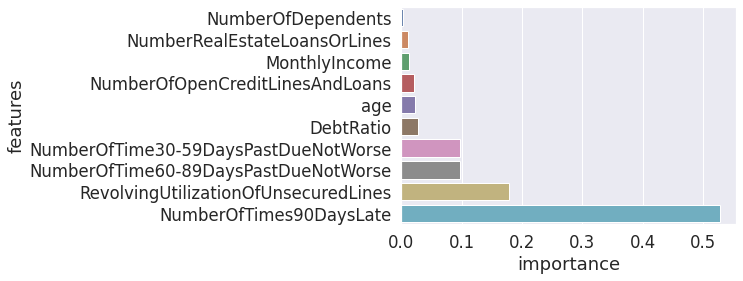

In [ ]:
feature_importance = pd.DataFrame({'features': X.columns, 'importance': bestGbModFitted.feature_importances_}).sort_values(by='importance')
sns.barplot(x='importance', y='features', data=feature_importance)

# **ROC curve and find the optimal point**

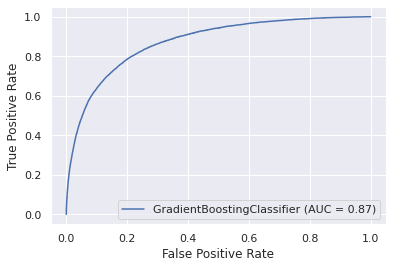

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(bestGbModFitted, scaled_X, y)  

In [ ]:
from sklearn.metrics import roc_curve, classification_report
fpr, tpr, thresholds = roc_curve(y, bestGbModFitted.predict_proba(scaled_X)[:, 1])
optimal_point = thresholds[np.argmax(tpr - fpr)]
optimal_point

0.0667302522184617

# **Plot the confusion matrix and classification report**

In [ ]:
def classify(prob):
    if prob > optimal_point:
        return 1
    return 0
y_pred = np.array([classify(prob) for prob in bestGbModFitted.predict_proba(scaled_X)[:, 1]])
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
! pip install -q scikit-plot

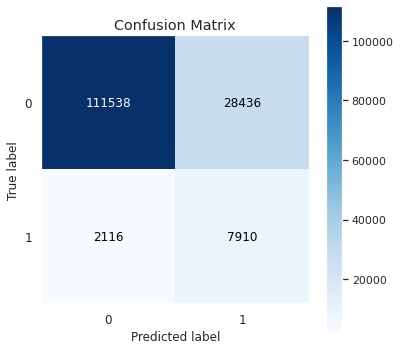

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y, y_pred, figsize=(6,6))

In [ ]:
print('\n*Classification Report:\n', classification_report(y, y_pred))


*Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88    139974
           1       0.22      0.79      0.34     10026

    accuracy                           0.80    150000
   macro avg       0.60      0.79      0.61    150000
weighted avg       0.93      0.80      0.84    150000



# **Demo Webapp**

In [ ]:
!pip install streamlit
!pip install -q streamlit_ace
!pip install pyngrok

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import pickle
import streamlit as st
from sklearn.preprocessing import StandardScaler
 
# loading the trained model
model = pickle.load(open('XGBoost_model.pkl', 'rb'))
cleaned_X = pd.read_csv('prepared_X.csv')
scaler = StandardScaler()
scaled_X = scaler.fit_transform(cleaned_X)
optimal_point = 0.0667

In [ ]:
%%writefile app.py
 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import pickle
import streamlit as st
from sklearn.preprocessing import StandardScaler
 
# loading the trained model
model = pickle.load(open('XGBoost_model.pkl', 'rb'))
cleaned_X = pd.read_csv('prepared_X.csv')
scaler = StandardScaler()
scaled_X = scaler.fit_transform(cleaned_X)
optimal_point = 0.0667

def prediction(RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime3059DaysPastDueNotWorse, DebtRatio,
               MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines,
               NumberOfTime6089DaysPastDueNotWorse, NumberOfDependents):   

    input = np.array([[RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime3059DaysPastDueNotWorse, DebtRatio,
                      MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines,
                      NumberOfTime6089DaysPastDueNotWorse, NumberOfDependents]])

    # Scaler
    scaled_input = scaler.transform(input)
 
    # Making predictions 
    prob = model.predict_proba(scaled_input)[0][1]

    if prob > optimal_point:
        pred = 'The probability that this customer will experience financial distress in the next two years is ' + str(round(prob, 2)) + '. The result is Rejected'
    else:
        pred = 'The probability that this customer will experience financial distress in the next two years is ' + str(round(prob, 2)) + '. The result is Approved'
    return pred


# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Loan Approval ML App</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    RevolvingUtilizationOfUnsecuredLines = st.sidebar.slider("RevolvingUtilizationOfUnsecuredLines", 0.0, 1.0)
    age = st.sidebar.slider("age", 21, 109)
    NumberOfTime3059DaysPastDueNotWorse = st.sidebar.slider("NumberOfTime3059DaysPastDueNotWorse", 0, 13)
    DebtRatio = st.sidebar.slider("DebtRatio", 0.0, 1.7)
    MonthlyIncome = st.sidebar.slider("MonthlyIncome", 0, 17500)
    NumberOfOpenCreditLinesAndLoans = st.sidebar.slider("NumberOfOpenCreditLinesAndLoans", 0, 50)
    NumberOfTimes90DaysLate = st.sidebar.slider("NumberOfTimes90DaysLate", 0, 17)
    NumberRealEstateLoansOrLines = st.sidebar.slider("NumberRealEstateLoansOrLines", 0, 17)
    NumberOfTime6089DaysPastDueNotWorse = st.sidebar.slider("NumberOfTime6089DaysPastDueNotWorse", 0, 11)
    NumberOfDependents = st.sidebar.slider("NumberOfDependents", 0, 10)
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime3059DaysPastDueNotWorse, DebtRatio,
               MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines,
               NumberOfTime6089DaysPastDueNotWorse, NumberOfDependents) 
        st.success(result)

if __name__ == '__main__':
	  main()

Overwriting app.py


In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

2021-07-06 13:08:51.080 INFO    pyngrok.ngrok: Opening tunnel named: http-8501-045c1bad-9a3c-478b-a66d-1ad481fe408b
2021-07-06 13:08:51.120 INFO    pyngrok.process.ngrok: t=2021-07-06T13:08:51+0000 lvl=info msg="no configuration paths supplied"
2021-07-06 13:08:51.126 INFO    pyngrok.process.ngrok: t=2021-07-06T13:08:51+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2021-07-06 13:08:51.130 INFO    pyngrok.process.ngrok: t=2021-07-06T13:08:51+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2021-07-06 13:08:51.133 INFO    pyngrok.process.ngrok: t=2021-07-06T13:08:51+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-07-06 13:08:51.234 INFO    pyngrok.process.ngrok: t=2021-07-06T13:08:51+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2021-07-06 13:08:51.238 INFO    pyngrok.process.ngrok: t=2021-07-06T13:08:51+0000 lvl=info msg="client session established" obj=csess id=89a900737812

<NgrokTunnel: "http://c124c30fbb91.ngrok.io" -> "http://localhost:8501">

2021-07-06 13:08:51.324 INFO    pyngrok.process.ngrok: t=2021-07-06T13:08:51+0000 lvl=info msg=start pg="/api/tunnels/http-8501-045c1bad-9a3c-478b-a66d-1ad481fe408b (http)" id=f342a19736555eeb
2021-07-06 13:08:51.327 INFO    pyngrok.process.ngrok: t=2021-07-06T13:08:51+0000 lvl=info msg=end pg="/api/tunnels/http-8501-045c1bad-9a3c-478b-a66d-1ad481fe408b (http)" id=f342a19736555eeb status=200 dur=186.377µs


# PCA and K-mean

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.ticker import FuncFormatter
pca = PCA(n_components=10)
X_new = pca.fit_transform(scaled_X) # project the original data into the PCA space

Text(0, 0.5, 'Cumulative explained variance')

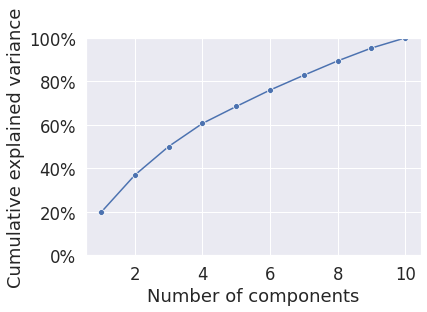

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
ax = sns.lineplot(x = range(1, 11), y = cumsum, marker='o')
plt.ylim(0, 1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Text(0.5, 1.0, 'Loadings')

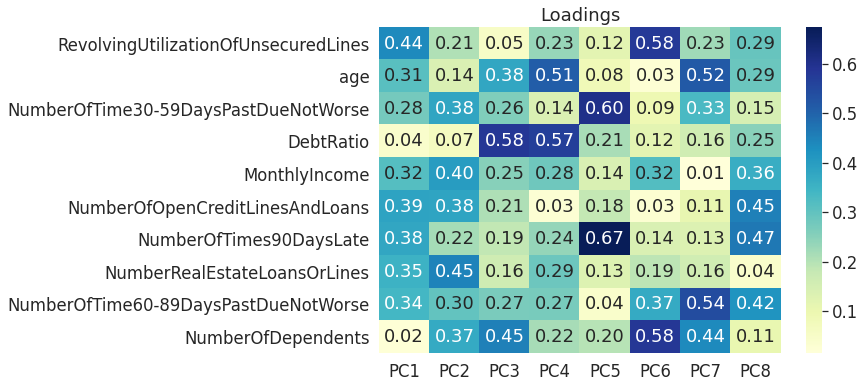

In [ ]:
loadings = abs(pca.components_.T)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index=X.columns)
plt.figure(figsize=(9, 6))
sns.heatmap(loading_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Loadings')

# One component

Text(0.5, 1.0, 'K-mean with 1 component')

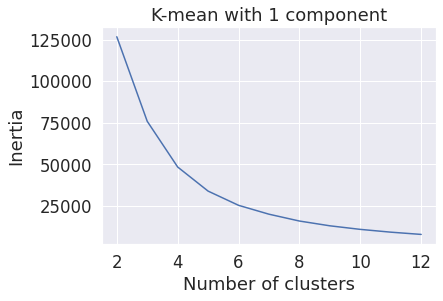

In [ ]:
#Choosing optimal K
cost = []
range_clusters = list(range(2, 13))
for num_clusters in range_clusters:
    kmean = KMeans(n_clusters=num_clusters)
    kmean.fit_predict(X_new[:, :1])
    cost.append(kmean.inertia_)
    
sns.lineplot(x=range_clusters, y=cost)
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.title('K-mean with 1 component')

In [ ]:
kmean = KMeans(n_clusters=5)
kmean.fit_predict(X_new[:, :1])
kmean.labels_

array([1, 0, 0, ..., 1, 3, 1], dtype=int32)

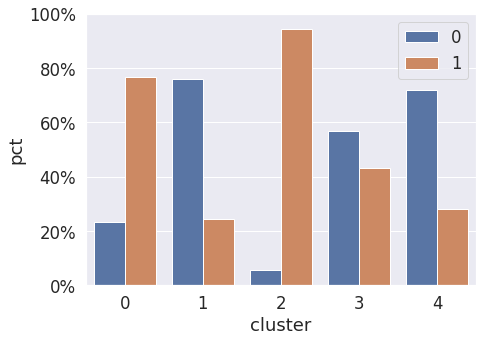

In [ ]:
df = pd.DataFrame(data={'cluster': kmean.labels_,
                   'target': y})
num_target_1 = y.sum()
num_target_0 = len(y) - num_target_1

df = df.groupby(['cluster', 'target']).size().reset_index().rename(columns={0: 'pct'})
df.loc[df['target'] == 0, 'pct'] = df.loc[df['target'] == 0, 'pct'] / num_target_0
df.loc[df['target'] == 1, 'pct'] = df.loc[df['target'] == 1, 'pct'] / num_target_1

df = df.merge(df.groupby('cluster').sum().reset_index().drop('target', axis=1).rename(columns={'pct': 'sum'}), left_on='cluster', right_on='cluster')
df['pct'] = df['pct']/df['sum']

plt.figure(figsize=(7, 5))
ax = sns.barplot(data=df, x='cluster', y='pct', hue='target')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.ylim(0, 1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

# Chọn số component và số cluster để phân cụm

In [ ]:
d = {}
for num_comp in range(1, 9):
    for num_clusters in range(2, 8):
        kmean = KMeans(n_clusters=num_clusters)
        kmean.fit_predict(X_new[:, :num_comp])
        
        df = pd.DataFrame(data={'cluster': kmean.labels_,
                   'target': y})
        num_target_1 = y.sum()
        num_target_0 = len(y) - num_target_1

        df = df.groupby(['cluster', 'target']).size().reset_index().rename(columns={0: 'pct'})
        df.loc[df['target'] == 0, 'pct'] = df.loc[df['target'] == 0, 'pct'] / num_target_0
        df.loc[df['target'] == 1, 'pct'] = df.loc[df['target'] == 1, 'pct'] / num_target_1

        df = df.merge(df.groupby('cluster').sum().reset_index().drop('target', axis=1).rename(columns={'pct': 'sum'}), left_on='cluster', right_on='cluster')
        df['pct'] = df['pct']/df['sum']

        res = 0
        for i in range(len(df['pct'])):
            if i % 2 == 0:
                res += abs(df['pct'][i] - df['pct'][i + 1])
        res = res / (len(df['pct']) / 2)
        d[(num_comp, num_clusters)] = res


Text(0.5, 1.0, 'Selection Matrix')

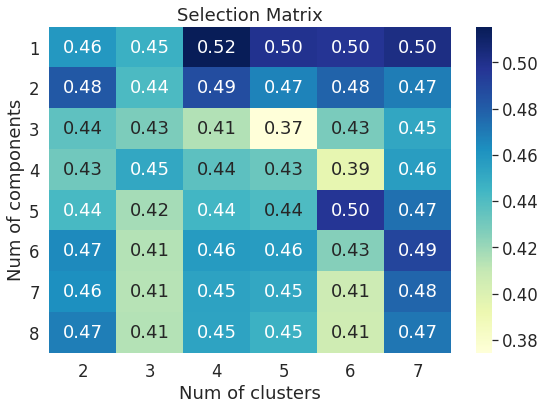

In [ ]:
idx = pd.MultiIndex.from_tuples(d.keys())
df_selection = pd.DataFrame(list(d.values()), index=idx, columns=['x']).unstack(fill_value=0)['x']

plt.figure(figsize=(9, 6))
sns.heatmap(df_selection, cmap="YlGnBu", annot=True, fmt=".2f")
plt.yticks(rotation=0)
plt.xlabel('Num of clusters')
plt.ylabel('Num of components')
plt.title('Selection Matrix')

# Lấy 5 components để phân 6 cụm

Text(0.5, 1.0, 'K-mean with 5 component')

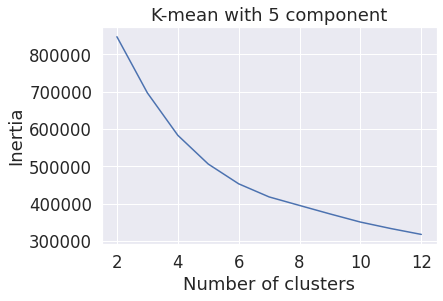

In [ ]:
from sklearn.cluster import KMeans
#Choosing optimal K
cost = []
range_clusters = list(range(2, 13))
for num_clusters in range_clusters:
    kmean = KMeans(n_clusters=num_clusters)
    kmean.fit_predict(X_new[:, :5])
    cost.append(kmean.inertia_)
    
sns.lineplot(x=range_clusters, y=cost)
plt.ylabel('Inertia')
plt.xlabel('Number of clusters')
plt.title('K-mean with 5 component')

In [ ]:
kmean = KMeans(n_clusters=6)
kmean.fit_predict(X_new[:, :5])
kmean.labels_

array([2, 4, 4, ..., 0, 4, 5], dtype=int32)

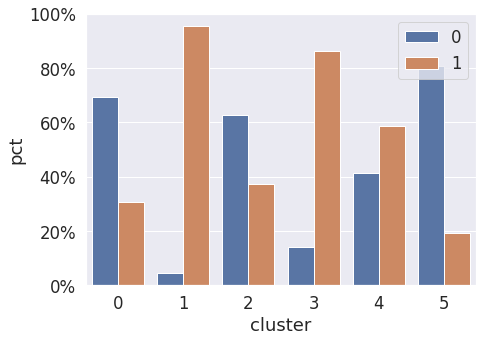

In [ ]:
df = pd.DataFrame(data={'cluster': kmean.labels_,
                   'target': y})
num_target_1 = y.sum()
num_target_0 = len(y) - num_target_1

df = df.groupby(['cluster', 'target']).size().reset_index().rename(columns={0: 'pct'})
df.loc[df['target'] == 0, 'pct'] = df.loc[df['target'] == 0, 'pct'] / num_target_0
df.loc[df['target'] == 1, 'pct'] = df.loc[df['target'] == 1, 'pct'] / num_target_1

df = df.merge(df.groupby('cluster').sum().reset_index().drop('target', axis=1).rename(columns={'pct': 'sum'}), left_on='cluster', right_on='cluster')
df['pct'] = df['pct']/df['sum']

plt.figure(figsize=(7, 5))
ax = sns.barplot(data=df, x='cluster', y='pct', hue='target')
ax.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.ylim(0, 1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

In [ ]:
X['cluster_label'] = kmean.labels_
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cluster_label
1,0.766127,45,2.0,0.802982,9120.0,13,0.0,6,0.0,2.0,2
2,0.957151,40,0.0,0.121876,2600.0,4,0.0,0,0.0,1.0,4
3,0.658180,38,1.0,0.085113,3042.0,2,1.0,0,0.0,0.0,4
4,0.233810,30,0.0,0.036050,3300.0,5,0.0,0,0.0,0.0,4
5,0.907239,49,1.0,0.024926,16867.0,7,0.0,1,0.0,0.0,2


In [ ]:
radar_df = X.groupby('cluster_label').mean().reset_index()
for col in radar_df.columns[1:]:
    radar_df[col] = (radar_df[col] - radar_df[col].min()) / (radar_df[col].max() - radar_df[col].min()) * 100
    radar_df[col] = 0.8 * radar_df[col] + 10
radar_df.head()

,cluster_label,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,20.847952,70.283789,10.605463,90.000000,15.217042,47.544060,10.222776,46.104215,10.073640,10.916586
1,1,90.000000,31.457964,53.039312,36.624188,20.154220,15.848822,90.000000,20.513396,90.000000,56.622004
2,2,25.386271,48.860150,12.977729,22.921481,90.000000,90.000000,10.082862,90.000000,10.257904,90.000000
3,3,70.702742,40.940719,90.000000,36.055827,29.342755,57.686749,16.159386,41.241657,42.757889,47.953722
4,4,59.660608,10.000000,12.889563,21.145315,10.000000,10.000000,12.121939,10.000000,11.324916,52.406048


In [ ]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories=list(radar_df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black',fontfamily='serif',fontweight='light', size=8)
    #ax.set_xticks([]) # turn labels off if you want - can look quite nice

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30,40,50,75,100], ["10%","20%","30%","40%","50%","75%","100%"], color="grey", size=4)
    plt.ylim(0,100)

    # Ind1
    values=radar_df.loc[row].drop('cluster_label').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=10, fontfamily='serif',fontweight='bold', y=1.2)
    plt.tight_layout()

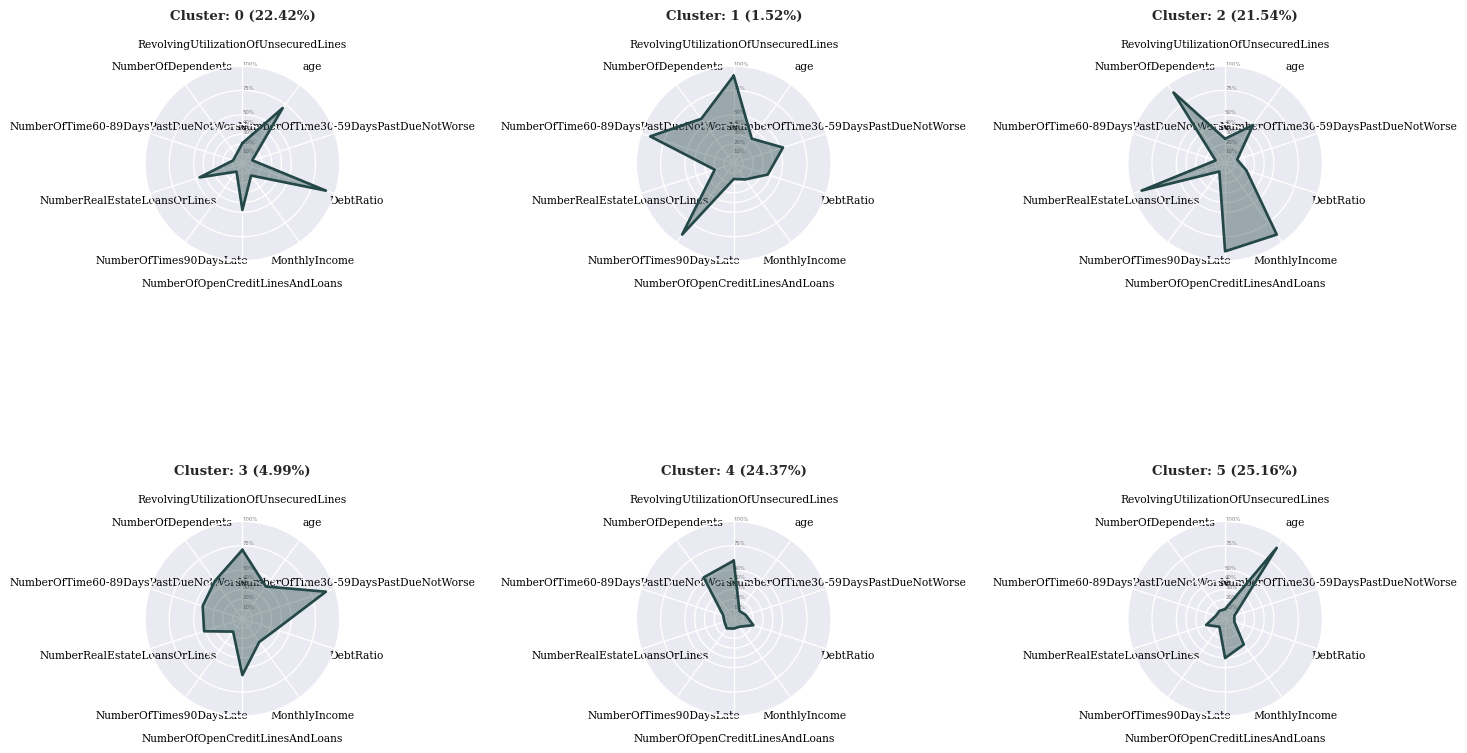

In [ ]:
my_dpi=96

plt.figure(figsize=(1500/my_dpi, 1500/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("crest", len(radar_df.index))
 
# Loop to plot
for row in range(0, len(radar_df.index)):
    label_name = radar_df['cluster_label'][row]
    pct_customers = round((X['cluster_label'] == label_name).sum()/len(X)*100, 2)
    make_spider(row=row, title='Cluster: '+ str(label_name) + ' (' + str(pct_customers)+ '%)', 
                color='#244747') #change this to my_palette if you want colour to vary by cluster
    

Text(0.5, 1.0, 'Visualization on 2 PCs')

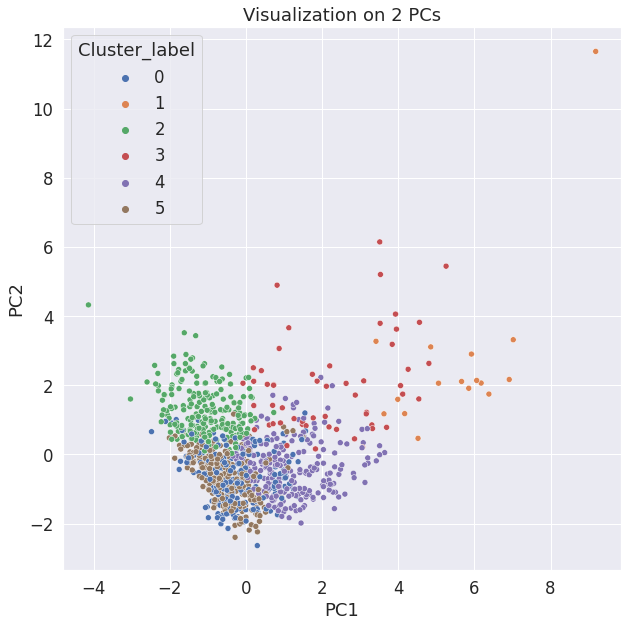

In [ ]:
df_viz = pd.DataFrame(data={'PC1': X_new[:, 0], 'PC2': X_new[:, 1]})
df_viz['Cluster_label'] = kmean.labels_
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_viz.sample(1000), x='PC1', y='PC2', hue='Cluster_label', palette="deep")
plt.title('Visualization on 2 PCs')

In [ ]:
|